# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)


# Combine the data into a single DataFrame
mouse_study = pd.merge( study_df,mouse_df, on =['Mouse ID'], how = 'left')


#Display the number of unique mice IDs in the data

#mouse_id_unique_count = mouse_id_unique_count.count(numeric_only = True)
#mouse_id_unique_count 

# Counting number of duplicates
#duplicates_mouse_study = mouse_study.duplicated(subset = ['Mouse ID','Timepoint'])
#Display the data associated with that mouse ID
#duplicates_mouse_study = mouse_study.loc[mouse_study['Timepoint'].duplicated(),:]
 
# Display the data table for preview

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.


len(mouse_study['Mouse ID'].unique())

249

In [3]:
type(mouse_study)

pandas.core.frame.DataFrame

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_study.loc[mouse_study.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study['Mouse ID'].isin(mouse_duplicate) == False]
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_mean = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_median = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_variance = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_stdv = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_stderr = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mouse_mean,
    'Median Tumor Volume': mouse_median,
    'Tumor Volume Variance':mouse_variance,
    'Tumor Volume Std. Dev.':mouse_stdv,
    'Tumor Volume Std. Err.':mouse_stderr
    
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_alt = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std',"sem"])
summary_df_alt


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
mouse_study_clean
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints '>

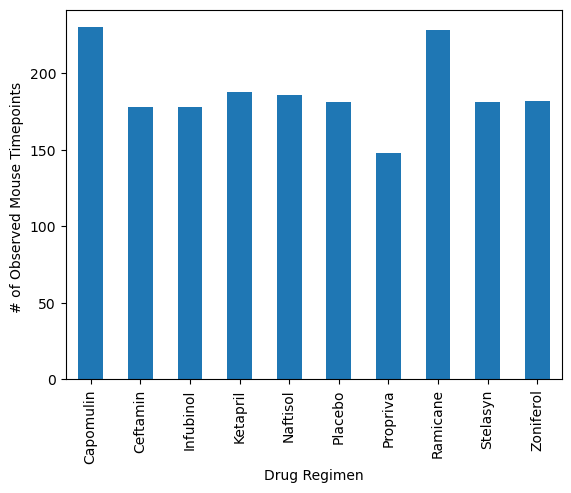

In [11]:
timepoint_vs_drug = mouse_study_clean.groupby('Drug Regimen')['Timepoint'].size()
timepoint_vs_drug.plot(kind = 'bar', x = 'Drug Regimen', y = 'Timepoint',ylabel = '# of Observed Mouse Timepoints ')

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.



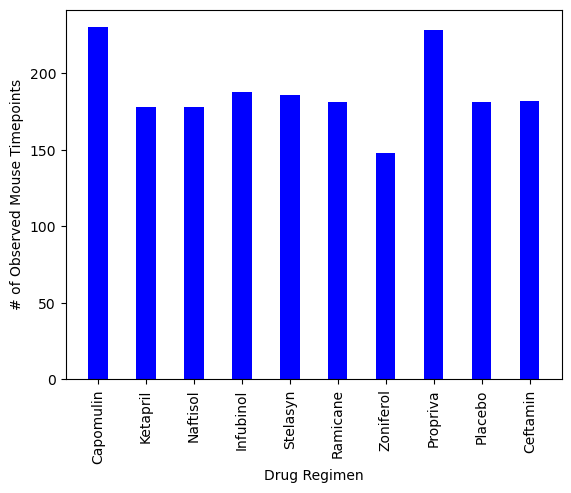

In [41]:


x_axis = mouse_study_clean['Drug Regimen'].unique()
y_axis = mouse_study_clean.groupby('Drug Regimen')['Timepoint'].size()

plt.bar(x_axis,y_axis, color ='blue',width = 0.4)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(x_axis, rotation ='vertical')
plt.show()

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


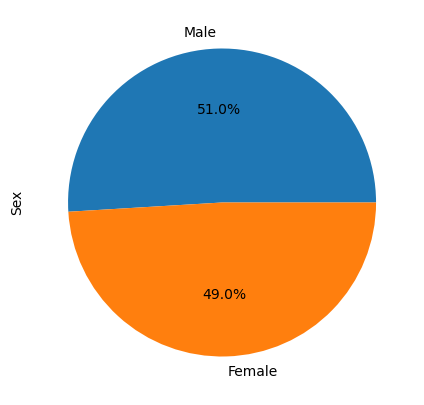

In [15]:
sex_of_mice = mouse_study_clean['Sex'].value_counts()
plot = sex_of_mice.plot.pie(y = 'Sex', figsize=(5, 5),autopct='%1.1f%%')


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


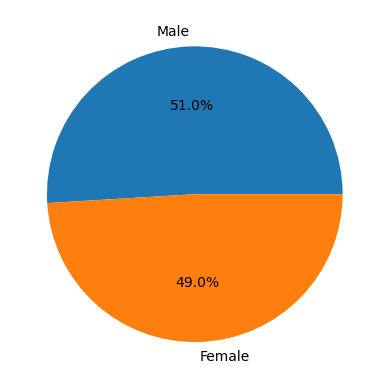

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male','Female'
sex_of_mice = mouse_study_clean['Sex'].value_counts()
sex_of_mice
fig, ax = plt.subplots()
ax.pie(sex_of_mice, labels = labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:

last_timepoint = pd.DataFrame(mouse_study_clean.groupby(["Mouse ID"])['Timepoint'].last())

clean_timepoint = last_timepoint.merge(mouse_study_clean, on =['Mouse ID','Timepoint'],how = 'left')
clean_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = mouse_study_clean.groupby(['Drug Regimen','Mouse ID'])
last_timepoint = max_timepoint.last()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_tumor_values = last_timepoint.reset_index()
df_tumor_values

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q3, q1 = np.percentile(tumor_vol, [75 ,25])
iqr = q3 - q1
iqr
   # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    #last_timepoint['Tumor Volume (mm3)']
    final_tumor_value = clean_timepoint.loc[clean_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
   
    
    # add subset 
    tumor_vol_data.append(final_tumor_value)
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    

17.10923096124998
93.82025999125003
17.10923096124998
93.82025999125003
17.10923096124998
93.82025999125003
17.10923096124998
93.82025999125003


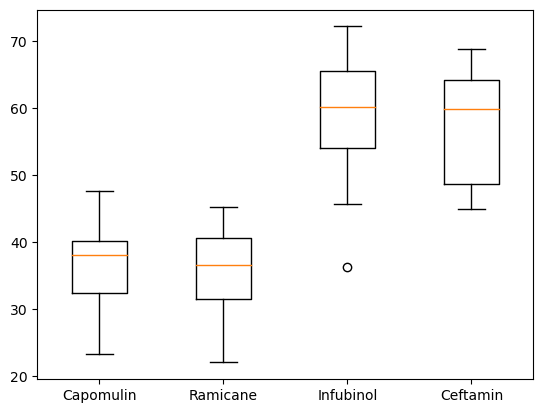

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
plt.boxplot(tumor_vol_data,labels=labels)
plt.show() 

## Line and Scatter Plots

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot("Tumor Volume (mm3)","Timepoint", data = clean_timepoint['Mouse ID'='b128'])
plt.plot

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1728082838.py, line 2)

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
